In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 讀取檔案
df = pd.read_csv("water_potability.csv")

# 填充缺失值
df["ph"].fillna(value=df["ph"].median(), inplace=True)
df["Sulfate"].fillna(value=df["Sulfate"].median(), inplace=True)
df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].median(), inplace=True)
df.isnull().sum()

# 切分特徵和目標變量
X = df.drop("Potability", axis=1)
y = df["Potability"]

# 分割資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

模型準確率：0.62
分類報告：
              precision    recall  f1-score   support

           0       0.63      0.98      0.76       412
           1       0.31      0.02      0.03       244

    accuracy                           0.62       656
   macro avg       0.47      0.50      0.40       656
weighted avg       0.51      0.62      0.49       656



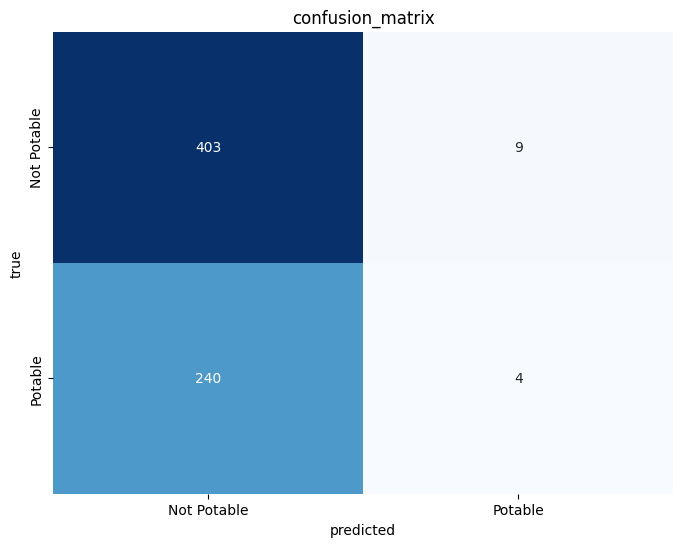

In [3]:
#SVM
# 初始化 SVM 分類器
svm_classifier = SVC(kernel='linear')

# 訓練 SVM 模型
svm_classifier.fit(X_train, y_train)

# 使用測試集進行預測
y_pred = svm_classifier.predict(X_test)

# 評估模型準確率
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確率：{accuracy:.2f}")

# 顯示分類報告
print("分類報告：")
print(classification_report(y_test, y_pred))

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 顯示混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.title('confusion_matrix')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

模型的準確度: 0.6737804878048781
分類報告:
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       412
           1       0.60      0.38      0.46       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.61       656
weighted avg       0.66      0.67      0.65       656



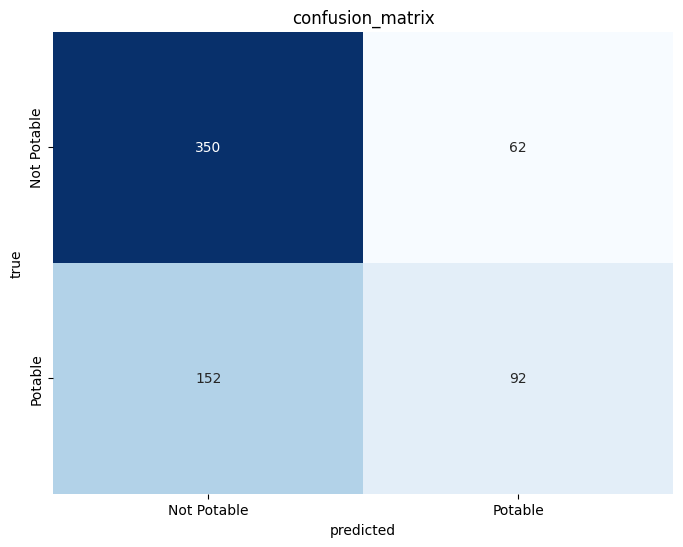

In [5]:
#RandomForest
# 創建一個隨機森林分類器
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# 訓練模型
rf_classifier.fit(X_train, y_train)

# 使用測試集進行預測
y_pred = rf_classifier.predict(X_test)

# 計算模型的準確度
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的準確度: {accuracy}")

# 列印分類報告
report = classification_report(y_test, y_pred)
print("分類報告:\n", report)

# 混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 顯示混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.title('confusion_matrix')
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()